Mounted at /content/drive


In [ ]:
import pandas as pd
from google.colab import drive
drive.mount("/content/drive")
df = pd.read_csv("/content/drive/MyDrive/DLNLP/OnlineNewsPopularity.csv")
df = df.iloc[:,1:]
df 

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,671.0,173.125,26900.0,843300.0,374962.500000,2514.742857,4004.342857,3031.115764,11400.0,48000.0,37033.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.025038,0.025001,0.151701,0.025000,0.773260,0.482679,0.141964,0.037572,0.014451,0.722222,0.277778,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,7.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,616.0,184.000,6500.0,843300.0,192985.714286,1664.267857,5470.168651,3411.660830,2100.0,2100.0,2100.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.029349,0.028575,0.231866,0.681635,0.028575,0.564374

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow as tf
tf.random.set_seed(1)
from tensorflow.python.keras.layers import Dense, BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import keras
from keras.models import load_model



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
k = 30000
trainX = df.iloc[:k,:59].values
trainY = df.iloc[:k,59].values
testX = df.iloc[k:,:59].values
testY = df.iloc[k:,59].values

trainY = trainY.reshape(-1,1)
testY = testY.reshape(-1,1)

scaler = MinMaxScaler()
trainX = scaler.fit_transform(trainX)
testX = scaler.transform(testX)

scaler = MinMaxScaler()
trainY= scaler.fit_transform(trainY)
testY = scaler.transform(testY)

In [ ]:
from keras import backend as K

def rmse(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 59)                3540      
_________________________________________________________________
dense_4 (Dense)              (None, 512)               30720     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 513       
Total params: 34,773
Trainable params: 34,773
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
422/422 [==============================] - 1s 2ms/step - loss: 0.0148 - rmse: 0.0148 - val_loss: 0.0081 - val_rmse: 0.0081
Epoch 2/100
422/422 [==============================] - 1s 2ms/step - loss: 0.0112 - rmse: 0.0112 - val_loss: 0.0087 - val_rmse: 0.0087
Epoch 3/100
422/422 [==============================] - 1s 2ms/step - loss: 0.0107 - rmse: 0.0107 - val_loss: 0

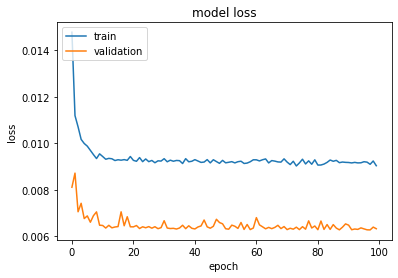

In [ ]:


model = Sequential()
model.add(Dense(59, input_dim=59, kernel_initializer='normal', activation='tanh'))
model.add(Dense(512, activation='tanh'))
model.add(Dense(1, activation='linear'))
model.summary()




opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=rmse, optimizer= opt, metrics=[rmse])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
history=model.fit(trainX, trainY, epochs=100, batch_size=64, verbose=1, validation_split=0.1)

print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()




In [ ]:
#model.save("/content/drive/MyDrive/DLNLP/my_model.h5")

In [ ]:
predictions = model.predict(testX)
print(rmse(testY,predictions))
print(rmse(scaler.inverse_transform(testY),scaler.inverse_transform(predictions)))

tf.Tensor(0.00912883091675041, shape=(), dtype=float64)
tf.Tensor(7698.3339811804535, shape=(), dtype=float64)


In [ ]:
loaded_model = load_model("/content/drive/MyDrive/DLNLP/my_model.h5",custom_objects={'rmse': rmse})
predictions = loaded_model.predict(testX)

print(rmse(testY,predictions))
print(rmse(scaler.inverse_transform(testY),scaler.inverse_transform(predictions)))

loaded_model.summary()


# print(mean_absolute_error(testY, predictions))
# print(mean_squared_error(testY, predictions))
# print(math.sqrt(mean_squared_error(testY, predictions)))

# predictions = scaler.inverse_transform(predictions)


# print(mean_absolute_error(scaler.inverse_transform(testY), predictions))
# print(mean_squared_error(scaler.inverse_transform(testY), predictions))
# print(math.sqrt(mean_squared_error(scaler.inverse_transform(testY), predictions)))


tf.Tensor(0.009100314421660531, shape=(), dtype=float64)
tf.Tensor(7674.286048676699, shape=(), dtype=float64)
Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 59)                3540      
_________________________________________________________________
dense_97 (Dense)             (None, 512)               30720     
_________________________________________________________________
dense_98 (Dense)             (None, 1)                 513       
Total params: 34,773
Trainable params: 34,773
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for layer in loaded_model.layers:
    weights = layer.get_weights() 
    print(weights)

In [ ]:
model

NameError: ignored